In [1]:
# Multivariate Linear Regression
# Predicting House Price from Size and Number of Bedrooms using Multivariate Linear Regression

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
# sample data

# 2104, 3, 399900
# 1600, 3, 329900
# 2400, 3, 369000
# 1416, 2, 232000
# 3000, 4, 539900
# 1985, 4, 299900
# 1534, 3, 314900
# 1427, 3, 198999
# 1380, 3, 212000
# 1494, 3, 242500

In [3]:
data = np.genfromtxt('https://raw.githubusercontent.com/Tan-Moy/medium_articles/master/art2_multivariate_linear_regression/home.txt', delimiter=',')

In [4]:
data.shape

(47, 3)

In [5]:
data[:5]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

In [6]:
# Normalize Data
data = normalize(data, axis=0)
data[:5]

array([[0.14276982, 0.13429844, 0.16105104],
       [0.10857021, 0.13429844, 0.13286006],
       [0.16285531, 0.13429844, 0.14860674],
       [0.09608463, 0.0895323 , 0.09343296],
       [0.20356914, 0.17906459, 0.217433  ]])

In [7]:
# Seperate Data into X and Y
X = data[:, 0:2]
Y = data[:, 2:]

In [8]:
# Visualize the Data

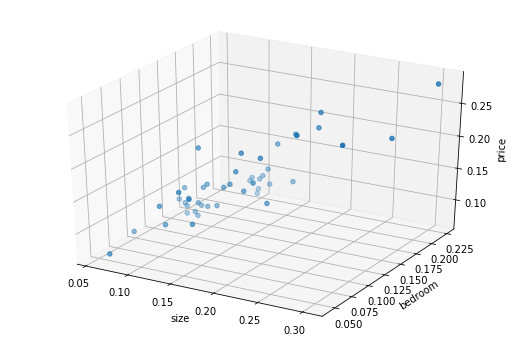

In [10]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('size')
ax.set_ylabel('bedroom')
ax.set_zlabel('price');


In [11]:
# Hyperparameters
learning_rate    = 0.10
max_iteration    = 500

s_learning_rate  = 0.10
s_max_iteration  = 500

mb_learning_rate = 0.10
mb_max_iteration = 500
batch_size = 16

In [12]:
# Parameters
theta    = np.zeros((data.shape[1], 1))
s_theta  = np.zeros((data.shape[1], 1))
mb_theta = np.zeros((data.shape[1], 1))

In [13]:
theta

array([[0.],
       [0.],
       [0.]])

In [14]:
X.shape

(47, 2)

In [15]:
# Hypothesis
# Beta1*x1 + Beta2*x2 + Beta3*x3 ...
# basically, y = f(x)

def h(theta, X) :
    tempX = np.ones((X.shape[0], X.shape[1] + 1))
    
    tempX[:, 1:] = X
    
    return np.matmul(tempX, theta)

In [16]:
# Loss Function
# (y - y')** 2

def loss(theta, X, Y):
    return np.average(np.square(Y - h(theta, X))) / 2

In [17]:
# Calculate Gradients
def gradient (theta, X, Y):
    tempX        = np.ones((X.shape[0], X.shape[1] + 1))
    tempX[:, 1:] = X
   
    # calculates the gradient 
    d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
    
    d_theta = d_theta.reshape((d_theta.shape[0], 1))
    
    return d_theta

In [18]:
# Batch Gradient Descent
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
    cost = np.zeros(max_iteration)
    
    for i in range(max_iteration):
        
        d_theta = gradient(theta, X, Y)
        
        theta   = theta - learning_rate * d_theta
        
        cost[i] = loss(theta, X, Y)
        
        # if i % gap == 0 :
        if i < 10:
            print ('iteration : ', i, ' loss : ', loss(theta, X, Y))       

    print ('iteration : ', i, ' loss : ', loss(theta, X, Y))        
    return theta, cost, i

In [19]:
# Stochastic Gradient Descent
def stochastic_gradient_descent (theta, X, Y, learning_rate, max_iteration, gap):
    cost = np.zeros(max_iteration)
    
    for i in range(max_iteration) :
        
        # process each house row
        for j in range(X.shape[0]):
            
            # calculate the coeff for the house row
            d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
            
            theta = theta - learning_rate * d_theta
    
            cost[i] = loss(theta, X, Y)
        
        if i < 10 :
            print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
    
    print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
    return theta, cost, i

In [20]:
# Mini-Batch Gradient Descent
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size, gap) :
    cost = np.zeros(max_iteration)
    
    for i in range(max_iteration) :
        
        for j in range(0, X.shape[0], batch_size):
            
            d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
            theta = theta - learning_rate * d_theta

    cost[i] = loss(theta, X, Y)
    
    if i % gap < 10 :
        print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
    
    print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
        
    return theta, cost, i

In [22]:
# Train Model

In [21]:
# batch gradient descent
theta, cost, max_iter_run = gradient_descent (theta, 
                                X, 
                                Y, 
                                learning_rate, 
                                max_iteration, 
                                100)

print("Max Iterations run : ", max_iter_run)

iteration :  0  loss :  0.008776379346285904
iteration :  1  loss :  0.007281059527137312
iteration :  2  loss :  0.006080137704981855
iteration :  3  loss :  0.005115632934071537
iteration :  4  loss :  0.004340983482887686
iteration :  5  loss :  0.003718797846091475
iteration :  6  loss :  0.003219048689512155
iteration :  7  loss :  0.002817622493527185
iteration :  8  loss :  0.0024951548408518776
iteration :  9  loss :  0.002236095091727298
iteration :  499  loss :  0.000964564858376951
Max Iterations run :  499


In [22]:
# stochastic gradient descent
s_theta, s_cost, max_iter_run = stochastic_gradient_descent (s_theta, 
                                               X, 
                                               Y, 
                                               s_learning_rate, 
                                               s_max_iteration, 
                                               100)

print("Max Iterations run : ", max_iter_run)

iteration :  0  loss :  0.0012241448494326598
iteration :  1  loss :  0.0011911177553978304
iteration :  2  loss :  0.0011666289671774144
iteration :  3  loss :  0.001142924978666325
iteration :  4  loss :  0.0011199403361130532
iteration :  5  loss :  0.001097652692512094
iteration :  6  loss :  0.0010760406249030845
iteration :  7  loss :  0.0010550833724418337
iteration :  8  loss :  0.001034760814619595
iteration :  9  loss :  0.0010150534514814101
iteration :  499  loss :  0.00034288135873955923
Max Iterations run :  499


In [23]:
# mini batch gradient descent
mb_theta, mb_cost, max_iter_run = minibatch_gradient_descent (mb_theta, 
                                                X, 
                                                Y, 
                                                mb_learning_rate, 
                                                mb_max_iteration, 
                                                batch_size, 
                                                100)

print("Max Iterations run : ", max_iter_run)

iteration :  499  loss :  0.0006850091863649956
Max Iterations run :  499


In [24]:
# Optimal values of Parameters using Trained Model
theta

array([[0.11462257],
       [0.11771331],
       [0.04803041]])

In [25]:
s_theta

array([[0.02406963],
       [0.77691605],
       [0.02696724]])

In [26]:
mb_theta

array([[0.08686169],
       [0.27636406],
       [0.08848329]])

Text(0.5,1,'Error vs. Training Epoch')

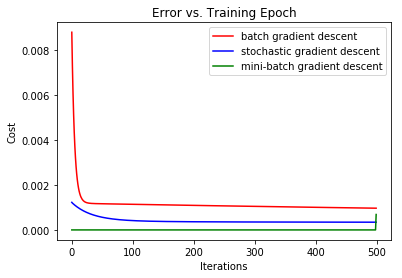

In [27]:
# Cost vs Iteration Plots
# plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), s_cost, 'b')  
ax.plot(np.arange(max_iteration), mb_cost, 'g')  

ax.legend(loc='upper right', labels=['batch gradient descent', 
                                     'stochastic gradient descent', 
                                     'mini-batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

#### Normal (batch GD)

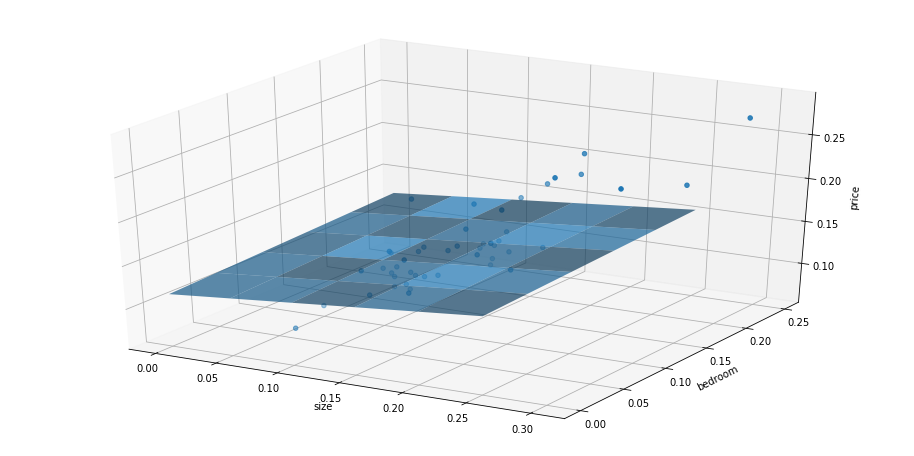

In [30]:
# Visualize the Data
# Fixing random state for reproducibility
# np.random.seed (19680801)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y

ax.scatter(xs, ys, zs)

ax.set_xlabel('size')
ax.set_ylabel('bedroom')
ax.set_zlabel('price')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7);

#### Stochastic  GD

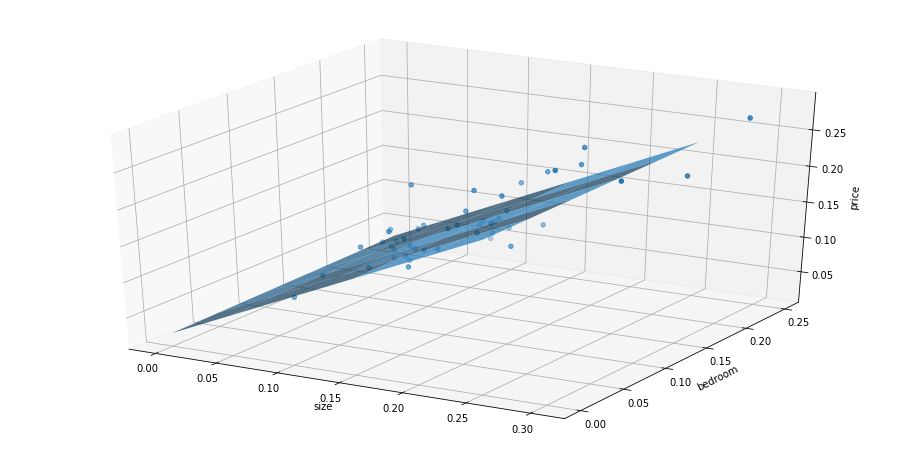

In [33]:
# Fixing random state for reproducibility
# np.random.seed (19680801)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y

ax.scatter(xs, ys, zs)

ax.set_xlabel('size')
ax.set_ylabel('bedroom')
ax.set_zlabel('price')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(s_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7);
    

#### Mini batch GD

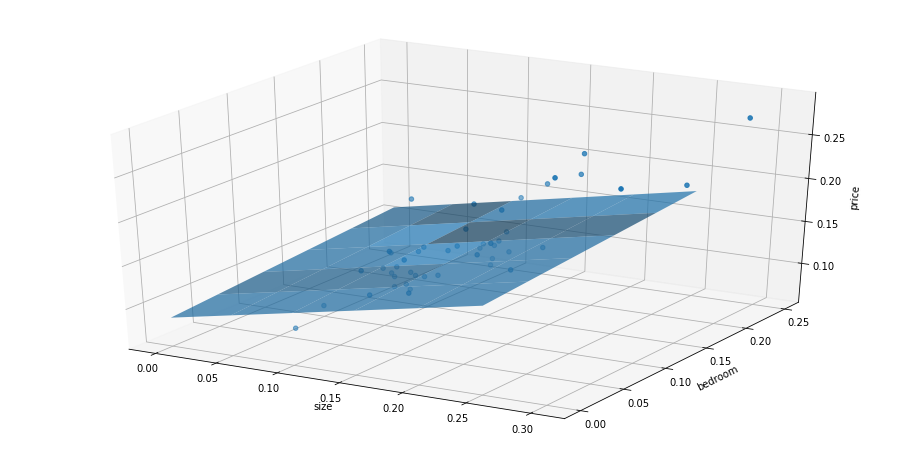

In [34]:
# Fixing random state for reproducibility
# np.random.seed (19680801)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(mb_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)
ax.plot_surface(xp, yp, zp, alpha=0.7)

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('size')
ax.set_ylabel('bedroom')
ax.set_zlabel('price');